# Práctica de laboratorio: contador SQL de Internet
## Nevarez García Litzy Yulissa

### Objetivos

- Parte 1: Configure su base de datos
- Parte 2: Conéctese a la base de datos
- Parte 3: Manipule los datos con pandas
- Parte 4: Una las tablas con pandas </b>

### Aspectos básicos/situación

En esta práctica de laboratorio aprenderá cómo conectarse a una base de datos relacional, y a extraer y manipular los datos a través de una computadora portátil de Jupyter. Los datos que se le proporcionan contienen distintas mediciones para la velocidad de ping, carga y descarga en diferentes autoridades locales alrededor de Inglaterra. De momento, los datos se almacenan en un archivo .csv, pero creará una base de datos y la completará con la medición.

### Usted podrá:

- Trabajar con una base de datos relacional
- Configurar SQLite
- Crear una nueva base de datos
- Utilizar csvsql para crear una nueva tabla y recuperar datos directamente de un archivo csv grande
- Conectarse a una base de datos con la biblioteca de Python sqlite3
- R- ealizar consultas de SQL básicas mediante Python
- Explorar la interacción entre pandas y una base de datos SQL
- Combinar dos tablas

### Recursos necesarios

- 1 computadora con acceso a Internet
- Raspberry Pi versión 2 o superior
- Bibliotecas de Python: sqlite3, pandas, matplotlib
- Bibliotecas adicionales: csvkit
- Archivos de datos: LA_wifi_speed_UK.csv, LA_population.csv

### Actualización de SQL
- Introducción muy breve a las bases de datos relacionales (temporales): http://searchsqlserver.techtarget.com/definition/relational-database</li>

- Más videos sobre las bases de datos relacionales: https://www.youtube.com/watch?v=jyju2P-7hPA&list=PLAwxTw4SYaPm4R6j_wzVOCV9fJaiQDYx4</li>

- Introducción a SQL: http://www.w3schools.com/sql/sql_intro.asp</li>

## Parte 1: Configure su base de datos

En esta parte, utilizará SQLite, una biblioteca de procesos que implementa un motor de bases de datos de SQL transaccionales autónomo, sin servidor, sin configuración para configurar el entorno.

**Paso 1: Configure el entorno de trabajo.**
Necesitaremos sqlite3 y csvkit para completar esta computadora portátil.

a) Instale SQLite.
En una computadora portátil de Jupyter, se pueden ejecutar los mismos comandos que se usarían en el terminal. Para hacerlo, comience la línea con un signo de exclamación (!).




In [1]:
# Code Cell 1
! sqlite3 InternetSpeed.db ".databases"

main: C:\Users\yulis\Analitica de los Datos en las organizaciones\InternetSpeed.db r/w


#### Este código crea la base de datos en una ventana del terminal. Si está utilizando el terminal, asegúrese de navegar al mismo directorio en el cual reside este laboratorio

In [ ]:
# Code Cell 2
#Create the InternetSpeed database


#### b)	Instale csvkit.

Instale csvkit en el terminal:

$pip install csvkit

También puede permanecer en el entorno de la computadora portátil, como lo hizo anteriormente, agregando el signo de exclamación al comienzo de la línea.

El archivo utilizado en esta parte de la práctica de laboratorio se denomina
./Data/LA_wifi_speed_UK.csv.


In [3]:
# Code Cell 3
#Installing csvkit
!pip install csvkit

## Parte 2: Conéctese a la base de datos

Python se utiliza para conectarse a la base de datos y ejecutar algunas consultas para saber cómo lucen estos datos.

Importe las bibliotecas:

In [2]:
# Code Cell 5
# this is the library to talk to the database
import sqlite3
import pandas as pd
# this is a library for data vizualization
from matplotlib import pyplot as plt
# this is to say that we want our plots to be part of this page, and not opene d in a new window
%matplotlib inline

### Paso 1: Conecte y ejecute una consulta.

Una conexión abierta y un cursor son necesarios para comunicarse con la base de datos. El cursor es una estructura de control que nos permitirá navegar por las tablas y los registros.

Para abrir una conexión, ejecute el método connect de la biblioteca sqlite3. Esta función toma una cadena que contiene el nombre de la base de datos para la cual la conexión es necesaria.

En este caso, el comando será:
#### a)	Conéctese a la base de datos que acaba de crear, y luego cree un cursor que apunte a la base de datos.

In [3]:
# Code Cell 6
# what is the name of the database you want to connect to? 
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

#### b)	Ejecute una consulta.

Seleccione las primeras 10 filas de la columna DateTime.

Sugerencia: Si desea revisar el nombre de las tablas en su base de datos, vuelva a la línea de comandos interactiva y utilice este código:

.tables


In [4]:
# Code Cell 7
# complete the query with the field you want to select, the table you want to select the field from,
# and the field you want your results to be ordered by 
query = 'SELECT DateTime FROM LA_wifi_speed_UK  ORDER BY DateTime LIMIT 10;'


cur.execute(query)


#### El resultado de la consulta se almacena en cur. Necesitamos iterar sobre ella para ver el resultado.

In [5]:
# Code Cell 8
for row in cur:
    print (row)

('2016-11-23 00:00:00',)
('2016-11-23 00:30:00',)
('2016-11-23 01:00:00',)
('2016-11-23 01:30:00',)
('2016-11-23 02:00:00',)
('2016-11-23 02:30:00',)
('2016-11-23 03:00:00',)
('2016-11-23 03:30:00',)
('2016-11-23 04:00:00',)
('2016-11-23 04:30:00',)


#### Nota: Necesitamos ordenar la tabla que contiene la medición según la columna DateTime. Esto es porque SQL no posee un orden intrínseco de las filas, y estamos lidiando con una serie de tiempo, que sin el orden correcto, no tiene sentido. La selección de una muestra aleatoria de filas quitaría el componente temporal:

In [6]:
# Code Cell 9
query = 'SELECT DateTime FROM LA_wifi_speed_UK ORDER BY RANDOM() LIMIT 10'
cur.execute(query)

for row in cur:
    print (row)


('2016-12-12 03:30:00',)
('2016-12-13 13:30:00',)
('2016-12-07 10:30:00',)
('2016-12-09 07:30:00',)
('2016-12-03 07:00:00',)
('2016-12-06 15:00:00',)
('2016-12-09 21:00:00',)
('2016-12-05 06:30:00',)
('2016-11-27 00:30:00',)
('2016-11-25 11:00:00',)


### Paso 2: Enfóquese en una porción de los datos.

¿Cuáles son los nombres de las 900+ columnas? Es posible recuperarlos automáticamente y guardarlos en una lista. Será práctico para distintas cosas más adelante.

En primer lugar, necesitamos ejecutar una consulta sobre todas las columnas. En este caso, no es importante la cantidad de filas que la consulta devuelve, de modo que la limitaremos a 1.

In [7]:
# Code Cell 10
# we need to have a cursor pointing to a table for this operation
query = 'SELECT * FROM LA_wifi_speed_UK LIMIT 1' 
cur.execute(query)

#### El nombre de las columnas de la tabla se almacena en el campo description del cursor.

In [8]:
# Code Cell 11
#visualizing the first 10 rows of the field description
cur.description[:10]

(('E07000223_p', None, None, None, None, None, None),
 ('E07000026_p', None, None, None, None, None, None),
 ('E07000032_p', None, None, None, None, None, None),
 ('E07000224_p', None, None, None, None, None, None),
 ('E07000170_p', None, None, None, None, None, None),
 ('E07000105_p', None, None, None, None, None, None),
 ('E07000004_p', None, None, None, None, None, None),
 ('E07000200_p', None, None, None, None, None, None),
 ('E09000002_p', None, None, None, None, None, None),
 ('E09000003_p', None, None, None, None, None, None))

##### Podemos dar vuelta los miembros de este campo e ingresar los nombres de las columnas en una lista (una estructura de datos práctica, en este caso). En Python, es posible generar listas como el resultado de un bucle. Este concepto se denomina comprensión de la lista y es sólo otro nombre para un bucle más largo. Cada elemento de la lista de resultados es la operación que haría en el bucle, mientras itera sobre cierto conjunto.

In [9]:
# Code Cell 12
# loop over the header and store them in a list
columns = [member[0] for member in cur.description]

# ignore index column
columns = columns[1:]

##### Las columnas contienen las mediciones de las tres velocidades para cada área geográfica. Se establecen de esta manera:

<area name>_<suffix>,

 El sufijo es p para ping, u para carga y d para descarga.

Necesitamos librarnos de los sufijos, porque estamos interesados en los nombres del área, y de momento cada nombre se repite tres veces. Utilizaremos el nombre de las áreas para mostrar las distintas mediciones y para generar una nueva tabla más adelante en la práctica de laboratorio.

Podemos reemplazar la parte final de la cadena mediante un carácter vacío. Para hacerlo, podemos utilizar el método replace() (consulte la documentación de la cadena, https://docs.python.org/2/library/string.html (https://docs.python.org/2/library/string.html)). Este método toma como entrada la parte de la cadena que se reemplazará y la nueva parte de la cadena que debe reemplazar. Por ejemplo, para quitar los caracteres e y s de la cadena 'chestnut', utilice este código:
'chestnut'.replace('es', '')
   



#### a)	Obtenga los nombres de área.

Utilice la comprensión de lista para dar vuelta la lista que contiene los nombres de las columnas de la tabla y quite los sufijos "_p", "_d" y "_u".

In [10]:
# Code Cell 13
# remove suffix '_p'
columns = [c.replace('_p', '') for c in columns]
# remove suffix '_d'
columns = [c.replace('_d', '') for c in columns]
# remove suffix '_u' # columns = ??
columns = [c.replace('_u', '') for c in columns]


# this operation is to remove duplicates
columns = list(set(columns))

In [11]:
# Code Cell 14
# visualize the first 10 areas
columns[:10]

['E07000153',
 'E09000033',
 'E07000187',
 'E06000044',
 'E07000219',
 'E09000031',
 'E08000012',
 'E07000211',
 'E06000006',
 'E07000040']

##### Para comprender mejor los datos en la base de datos es preciso visualizar una parte de ellos. En particular, queremos seleccionar las tres estadísticas de un área. En primer lugar, escojamos la primer área que tenemos en el conjunto de datos:

In [12]:
# Code Cell 15
area = columns[0] 
print (area)


E07000153


##### Ahora queremos mostrar los datos en relación con el área E07000101. Necesitamos seleccionar las columnas que contienen las tres mediciones para esta área. Para hacerlo, es necesario manipular las cadenas nuevamente.

##### Una forma de formatear una cadena es:

'We are considering {} area and {} statistics'.format(1, 3) We are considering 1 area and 3 statistics

##### Debemos agregar los sufijos de nuevo para obtener los nombres de columna correctos. Lo primero que debemos hacer es crear un diccionario que asocie el nombre completo de la medición al sufijo. También será útil escribir una leyenda significativa en el diagrama.


In [14]:
# Code Cell 16
suffix = {'_p':'ping', '_d':'download', '_u':'upload'}
# we have the suffixes as the keys of the dictionary
print(suffix.keys())

# we have the complete names as the values of the dictionary
print(suffix.values())

dict_keys(['_p', '_d', '_u'])
dict_values(['ping', 'download', 'upload'])


##### Ahora el proceso es dar vuelta las claves del diccionario, escribir y ejecutar la consulta para seleccionar la medición en relación con nuestra área y trazarla usando este código:

plt.plot(cur.fetchall(), label=suffix[s])


El método fetchall() recupera todas las filas del resultado de consulta. El campo label se utilizará para producir la leyenda del diagrama. También podemos agregar un título al diagrama, mediante el método title().

##### b)	Escriba la consulta para seleccionar las columnas relevantes.


TypeError: unhashable type: 'numpy.ndarray'

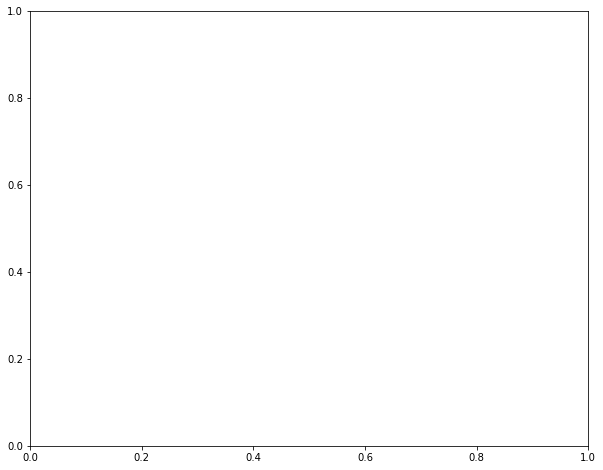

In [16]:
# Code Cell 17
area = columns[0]
plt.figure(figsize=(10, 8))

# Plot each variable in suffix.keys() for each area
for s in suffix.keys():
    query = 'SELECT "{}{}" FROM LA_wifi_speed_UK ORDER BY DateTime'.format(area, s)
    cur.execute(query)
    plt.plot(cur.fetchall(), label=suffix[s]) 
plt.legend()
plt.title(area)

# Parte 3: Manipule los datos con pandas
El objetivo es ahora calcular la velocidad promedio de WiFi para todas las áreas del conjunto de datos. Los pandas pueden ayudar en el almacenamiento y la visualización de los datos fácilmente.

## Paso 1: Convierta todas las mediciones a promedios.

Para cada autoridad local, queremos saber cuál era la velocidad promedio de Internet para el ping, la carga y la descarga en el período de tiempo en el que nuestros datos fueron recopilados. Los dataframes de pandas son útiles para este tipo de operaciones.

#### a)	Cree un dataframe vacío con columnas específicas.


In [17]:
# Code Cell 18
new_columns = ['Area', 'Average_p', 'Average_u', 'Average_d']
df = pd.DataFrame(columns = new_columns)

#### b)	Calcule los promedios.

Escriba la consulta SQL que computa el promedio de una columna y almacénela en una lista temporal. La lista será la fila nueva adjunta al dataframe. Esto tomará aproximadamente 1 minuto en el RaPi.


In [18]:
# Code Cell 19
# this will take a while...
for i in range(len(columns)-1): 
    tmp_list = []
    tmp_list.append(columns[i])
    for s in suffix.keys():
        query = 'SELECT AVG("{}{}") FROM LA_wifi_speed_UK'.format(columns[i], s)
        
        cur.execute(query)
        
        mean = cur.fetchone()
        tmp_list.append(mean[0])
    #append the columns to the empty DataFrame
df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)
# visualize the head of the dataframe here
df.head()

C:\Users\yulis\AppData\Local\Temp\ipykernel_9952\1156658711.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(tmp_list, index=new_columns), ignore_index=True)


,Area,Average_p,Average_u,Average_d
0,E07000075,52.253158,21.235539,8.330263


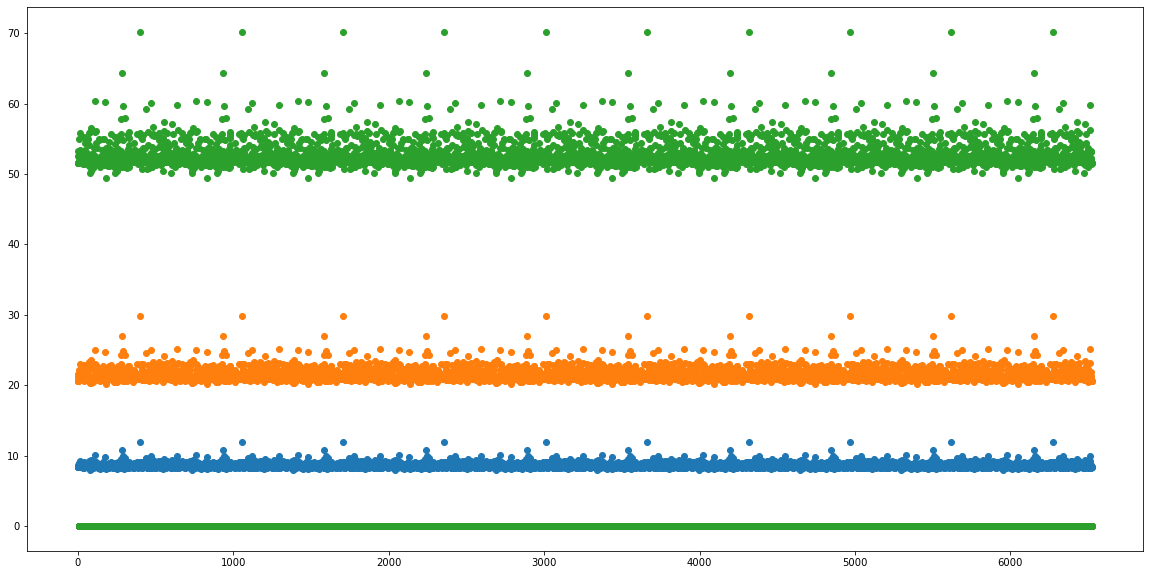

In [94]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df['Average_d'], 'o')
plt.plot(df.index, df['Average_u'], 'o')
plt.plot(df.index, df['Average_p'], 'o')


Ahora las velocidades promedio se almacenan en un dataframe de pandas. Podría resultar útil guardarlos en una tabla en nuestra base de datos, y los pandas ofrecen un método (to_sql()) para hacerlo En primer lugar, verifique si ya existe la tabla (esto puede crear problemas). Si existe, queremos descartarla y luego crearla. Si no, la crearemos directamente.

El constructo try... except capturará la excepción elevada en caso de que la tabla no exista y procederá a su creación (para obtener ayuda, consulte la Sección 8.3 de https://docs.python.org/2.7/tutorial/errors.html (https://docs.python.org/2.7/tutorial/errors.html)).

#### a)	Guarde el trabajo.

Guarde el nuevo dataframe en una tabla de la base de datos InternetSpeed.


In [19]:
# Code Cell 21
# Make sure to drop the table first if it already exists
try:
    cur.execute('DROP TABLE average_speed')
except:
    pass

# what is the name of the table you want to save? To what connection? # Save the dataframe table into a SQL table
df.to_sql('average_speed',conn)

1

In [20]:
# Code Cell 22
# just checking everything worked fine: select everything from the table we ju st created
# and then print the first two rows of the result

query_2 = 'SELECT * FROM average_speed' 
cur.execute(query_2)

# print the first fetched record
print(cur.fetchone())
# print the next fetched record
print(cur.fetchone())


(0, 'E07000075', 52.25315780178543, 21.235538605208998, 8.330262907258785)
None


## Parte 4: Una las tablas con pandas
Para comprender por qué y cómo cambia la velocidad promedio de Internet alrededor de las áreas, es necesario obtener más información sobre ellas. En particular, estamos interesados en los datos demográficos, para ver si un área con mucha población tiene un servicio de Internet mejor o peor.

### Paso 1: Obtenga información relevante.

Esta información se puede encontrar en este archivo:

./Data/LA_population.csv


Aquí, LA significa autoridad local, en lugar de Los Ángeles. Queremos unir la información contenida en este archivo con la velocidad promedio computada anteriormente. Primero, haga una nueva tabla y guarde estos datos en la base de datos InternetSpeed.

#### a)	Cree la tabla de la población.

Con csvsql, importe el archivo LA_population.csv a la base de datos InternetSpeed. Repita los pasos realizados para crear las otras tablas en la base de datos.


In [21]:
# Code Cell 23
#first close the database file, otherwise the external csvsql command cannot u se
conn.close()

In [105]:
# Code Cell 24
# use the external csvsql command to add to the DB file data from the CSV file #!csvsql --db sqlite:///...

# Las capturas para importar estan abajo

In [22]:
# Code Cell 25
#reopen the DB file
conn = sqlite3.connect('InternetSpeed.db')

cur = conn.cursor()


#### b)	Compruebe que todo haya funcionado.

Para comprobar que todo haya funcionado y tener una idea de qué hay dentro de esta nueva tabla, seleccione las primeras 10 filas e imprímalas.


In [29]:
# Code Cell 26 #query = ?
query = 'SELECT * FROM LA_population LIMIT 10'

cur.execute(query)


for row in cur:
    # print the first fetched record
    print(row)


('Aberdeen City', 'S12000033', '222793')
('Aberdeenshire', 'S12000034', '252973')
('Adur', 'E07000223', '61182')
('Allerdale', 'E07000026', '96422')
('Amber Valley', 'E07000032', '122309')
('Angus', 'S12000041', '115978')
('Antrim and Newtownabbey', 'N09000001', '138567')
('Ards and North Down', 'N09000011', '156672')
('Argyll and Bute', 'S12000035', '88166')
('Armagh City, Banbridge and Craigavon', 'N09000002', '199693')


Podemos unir las dos tablas para tener toda la información necesaria. La idea es que las dos tablas tengan un campo en común, el nombre del área. Esta es la clave sobre la que queremos unir. Esto significa que queremos una nueva tabla que tenga una fila para cada nombre de área que contenga información de velocidad promedio e información geográfica. La forma en que SQL lo hace es comparar fila por fila, y fusionar las filas con el mismo valor para la clave (es decir, el mismo nombre de área).

#### c)	Ejecute la consulta UNIR e imprima las primeras 10 filas del resultado.


In [38]:
# Code Cell 27
query = 'SELECT * FROM average_speed JOIN LA_population ON LA_population."LA_code"=average_speed.Area'

cur.execute(query)
k = 0
for row in cur:
    if k>10:
        break
    print (row)
    
    k+=1

(0, 'E07000075', 52.25315780178543, 21.235538605208998, 8.330262907258785, 'Rochford', 'E07000075', '83287')


![fondo](imports.png)